# Análise Exploratória - **State of Data Brazil 2022**

# 1\. Introdução

## 1\.1\. Contexto
O **State of Data Brazil 2022** [link](https://www.kaggle.com/datasets/datahackers/state-of-data-2022), é uma das maiores pesquisas sobre o mercado de trabalho brasileiro na área de dados. Realizada pelo **Data Hackers**, maior comunidade de dados do Brasil e **Bain & Company**, empresa de consultoria global que ajuda organizações a promover mudanças que definam o futuro de seus negócios.

A pesquisa foi realizada entre Outubro e Novembro de 2022 através de um questionário online reunindo indicadores relacionados a perfil demográfico, formação, atuação no setor, remuneração, rotatividade e fatores de satisfação no ambiente de trabalho, incluindo o impacto do trabalho remoto nas preferências profissionais de 4.271 respondentes de todo o Brasil.


## 1\.2\. Objetivo

Analisar faixa salarial dos três principais cargos na área de dados (Analista, Cientista e Engenheiro) de acordo com sua experiência.Para assim, entender como está o mercado no atual momento do País.

# 2\. Exploração

## 2\.1\. Dados
Os dados da pesquisa foram disponibilizados no site Kaggle [link](https://www.kaggle.com/). O arquivo está no formato **CSV**(Comma-separated values - Valores Separados por Vírgula), possui **353 colunas** e **4271 linhas** e 'pesa'por volta de **10MB.**

## 2\.2\. Upload
Acesso o Kaggle [link](https://www.kaggle.com), faça o *download* do arquivo no formato **CSV** e, em seguida, o *upload* no ambiente do Google Colab.

## 2\.3\. Exploração
Na etapa de exploração, foram encontradas as colunas de interesse: **Cargo, Experiência e Salário**.
A análise começa com a extração do cabeçalho do arquivo como um texto, ou *string* em **Python**.

In [137]:
# abrindo arquivo modo leitura salvando texto str na variavel header/line o cabeçalho
with open(file="State_of_data_2022.csv", mode="r") as fp:
  header = fp.readline()

print(header [0:200])



"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', '


In [138]:
# quebrando cabeçalho em lista e separar elementos P2 que são os elementos de carreira que nos interessam

header = header.split(sep='","')





In [139]:
print(header[0:10])
# interação para cada elemento combinamos se é P2
for column, column_name in enumerate(header):
  if 'P2'in column_name:
    print(str(column)+''+ column_name)

['"(\'P0\', \'id\')', "('P1_a ', 'Idade')", "('P1_a_1 ', 'Faixa idade')", "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')", "('P1_d ', 'PCD')", "('P1_e ', 'experiencia_profissional_prejudicada')", "('P1_f ', 'aspectos_prejudicados')", "('P1_g ', 'vive_no_brasil')", "('P1_i ', 'Estado onde mora')"]
16('P2_a ', 'Qual sua situação atual de trabalho?')
17('P2_b ', 'Setor')
18('P2_c ', 'Numero de Funcionarios')
19('P2_d ', 'Gestor?')
20('P2_e ', 'Cargo como Gestor')
21('P2_f ', 'Cargo Atual')
22('P2_g ', 'Nivel')
23('P2_h ', 'Faixa salarial')
24('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
25('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')
26('P2_k ', 'Você está satisfeito na sua empresa atual?')
27('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')
28('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')
29('P2_l_2 ', 'Salário atual não cor

In [140]:
 #Colunas de interesse:
 #21('P2_f ', 'Cargo Atual')
 #22('P2_g ', 'Nivel')
#23('P2_h ', 'Faixa salarial')

In [141]:
 #Resumo exploração:
with open(file="State_of_data_2022.csv", mode="r") as fp:
  header = fp.readline()

  for _ in range(10): # laço igual feito anteriormente no cabeçalho mas agora a interação é sobre x vezes comeco/meio e fim FOR

   line = fp.readline() # linhas como texto
   line = line.split(sep=',') # linha como lista
   print({"Cargo": line[21], "Experiencia": line[22], "Salário": line[23]})



{'Cargo': 'DBA/Administrador de Banco de Dados', 'Experiencia': 'Júnior', 'Salário': 'de R$ 8.001/mês a R$ 12.000/mês'}
{'Cargo': 'Supervisor/Coordenador', 'Experiencia': '', 'Salário': ''}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiencia': 'Pleno', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Cientista de Dados/Data Scientist', 'Experiencia': 'Sênior', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiencia': 'Pleno', 'Salário': 'de R$ 6.001/mês a R$ 8.000/mês'}
{'Cargo': 'Professor', 'Experiencia': 'Pleno', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiencia': 'Júnior', 'Salário': 'de R$ 4.001/mês a R$ 6.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiencia': 'Júnior', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiencia': 'Sênior

# 3\. Processamento


In [142]:
data = list()

with open(file="State_of_data_2022.csv", mode="r") as fp:
  header = fp.readline()
  line = fp.readline() # linhas como texto

  while line:  # aqui ja o laço é enquanto houver linha
    line = line.split(sep=',') # linha como lista
    data.append({"Cargo": line[21], "Experiencia": line[22], "Salário": line[23]})
    line = fp.readline() # linhas como texto

# a diferenca agora que extraimos e salvamos em uma lista (data).
#Atividade anterior só estava no printando.

In [143]:
for dado in data[0:10]:
  print(dado)



{'Cargo': 'DBA/Administrador de Banco de Dados', 'Experiencia': 'Júnior', 'Salário': 'de R$ 8.001/mês a R$ 12.000/mês'}
{'Cargo': 'Supervisor/Coordenador', 'Experiencia': '', 'Salário': ''}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiencia': 'Pleno', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Cientista de Dados/Data Scientist', 'Experiencia': 'Sênior', 'Salário': 'de R$ 12.001/mês a R$ 16.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiencia': 'Pleno', 'Salário': 'de R$ 6.001/mês a R$ 8.000/mês'}
{'Cargo': 'Professor', 'Experiencia': 'Pleno', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiencia': 'Júnior', 'Salário': 'de R$ 4.001/mês a R$ 6.000/mês'}
{'Cargo': 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', 'Experiencia': 'Júnior', 'Salário': 'de R$ 2.001/mês a R$ 3.000/mês'}
{'Cargo': 'Analista de BI/BI Analyst', 'Experiencia': 'Sênior

In [144]:
len(data) #elementos da lista numero de entrevistados

4271

## 3\.1\. Pandas

In [145]:
import pandas as pd

## 3\.2\. DataFrame
Abstração base do Pandas. Estrutura de dados que representa uma tabela de duas dimensões.

In [146]:
data_table = pd.DataFrame(data)

In [147]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
1,Supervisor/Coordenador,,
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês


In [148]:
data_table.shape

(4271, 3)

In [149]:
#salvando uma cópia ja de interesse com o nome data.csv
#Isso organiza sua análise tornando eficiente

data_table.to_csv("data.csv", header=True, index=False)


## 3\.3\. Limpeza
Uma boa análise de dados só é possível com dados consistente, portanto a limpeza do conjunto de dados se faz necessária.

Remoção de **linhas vazias**

In [150]:
#NA marcador de linha vazia metodo replace
data_table = data_table.replace('', pd.NA)


In [151]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
1,Supervisor/Coordenador,<NA>,<NA>
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês


In [152]:
#drop NA exclui
data_table = data_table.dropna()

In [153]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês
10,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês


In [154]:
#antes tinhamos 4271
#agora 2790 houve uma perda de dados, porém o analista não consegue atuar aqui.
data_table.shape


(2790, 3)

In [155]:
2790/4271
#Impacto de 35% estamos agora com 65% dos dados

0.6532428002809646

Remoção de **linhas corrompidas**
Linhas corrompidas podem derivar de diversos fatores: erros de processamento, erros humanos, digitação etc. Podemos manual ou automaticamente corrigi-las, ou ainda aplicar a técnica de deleção como feita anteriormente e a seguir:

In [156]:
#Pra cada linha na coluna salário verifica a existência do R$, caso contário exclui.
data_table['Salário'] = data_table['Salário'].apply(lambda row: row if 'R$' in row else pd.NA)
data_table = data_table.dropna()

<ipython-input-156-b8356d06d5dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table['Salário'] = data_table['Salário'].apply(lambda row: row if 'R$' in row else pd.NA)


In [157]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês
10,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês


In [158]:
data_table.shape




(2386, 3)

In [159]:
2386/4271
#Impacto de 45% estamos agora com 55% dos dados

0.5586513697026457

Seleção das **linhas de interesse** apenas com os cargos:


In [160]:
data_table['Cargo'].unique()

array(['DBA/Administrador de Banco de Dados',
       'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
       'Cientista de Dados/Data Scientist', 'Professor',
       'Analista de BI/BI Analyst',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Analista de Negócios/Business Analyst',
       'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
       'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)',
       'Analista de Dados/Data Analyst',
       'Analista de Suporte/Analista Técnico', 'Outra Opção',
       'Engenheiro de Machine Learning/ML Engineer', 'Analytics Engineer',
       'Analista de Marketing', 'Outras Engenharias (não inclui dev)',
       'Economista', 'Estatístico'], dtype=object)

In [161]:
positions = ['Analista de Dados/Data Analyst', 'Cientista de Dados/Data Scientist', 'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect']

In [162]:
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: row if row in positions else pd.NA)
data_table = data_table.dropna()

In [163]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista de Dados/Data Scientist,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista de Dados/Data Scientist,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [164]:
data_table.shape

(1336, 3)

In [165]:
1336/4271
#Impacto de 69% estamos agora com 31% dos dados

0.3128073050807773

Podemos **renomear** as profissões

In [166]:
labels = ['Analista', 'Cientista', 'Engenheira']
labels = dict(zip(positions, labels))
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: labels[row])

Salvamento dos dados processados

In [167]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheira,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheira,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheira,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheira,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [168]:
#verificando

data_table['Cargo'].unique()

array(['Cientista', 'Engenheira', 'Analista'], dtype=object)

In [169]:
#verificando
data_table['Experiencia'].unique()

array(['Sênior', 'Pleno', 'Júnior'], dtype=object)

In [170]:
#verificando
data_table['Salário'].unique()

array(['de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 6.001/mês a R$ 8.000/mês',
       'de R$ 8.001/mês a R$ 12.000/mês',
       'de R$ 3.001/mês a R$ 4.000/mês', 'de R$ 2.001/mês a R$ 3.000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês',
       'de R$ 25.001/mês a R$ 30.000/mês',
       'de R$ 30.001/mês a R$ 40.000/mês',
       'de R$ 1.001/mês a R$ 2.000/mês', 'Acima de R$ 40.001/mês',
       'de R$ 20.001/mês a R$ 25.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês', 'Menos de R$ 1.000/mês'],
      dtype=object)

In [171]:
#Salvando novamente as mudanças e limpezas
data_table.to_csv("data.csv", header=True, index=False)

# 4\. Insights - Agrupamentos e Agregações

Nesta etapa vamos agrupar os dados com uma operação matemática de soma em diversos níveis de agragação.


In [172]:
#Cria-se uma coluna unitária chamada *Quantidade* para facilitar o agrupamento e agregações
data_table['Quantidade'] = 1

In [173]:
data_table.head(n=15)

,Cargo,Experiencia,Salário,Quantidade
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
18,Engenheira,Pleno,de R$ 6.001/mês a R$ 8.000/mês,1
23,Engenheira,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,1
31,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
37,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
41,Engenheira,Júnior,de R$ 4.001/mês a R$ 6.000/mês,1
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês,1
49,Engenheira,Sênior,de R$ 8.001/mês a R$ 12.000/mês,1


## 4\.1\. **Por Salário**
No primeiro nível de agregação, contamos quantos profissionais estão em cada faixa salarial.



In [174]:
salario_agg = data_table[['Salário','Quantidade']].groupby('Salário').agg('sum').reset_index()

In [175]:
salario_agg.head(15)

,Salário,Quantidade
0,Acima de R$ 40.001/mês,12
1,Menos de R$ 1.000/mês,8
2,de R$ 1.001/mês a R$ 2.000/mês,59
3,de R$ 12.001/mês a R$ 16.000/mês,192
4,de R$ 16.001/mês a R$ 20.000/mês,49
5,de R$ 2.001/mês a R$ 3.000/mês,75
6,de R$ 20.001/mês a R$ 25.000/mês,24
7,de R$ 25.001/mês a R$ 30.000/mês,13
8,de R$ 3.001/mês a R$ 4.000/mês,89
9,de R$ 30.001/mês a R$ 40.000/mês,17


Uma operação comum em dados agregados é a **ordenação**. Aqui a coluna Salário não é numericamente ordenavél(aqui ela esta textual seria por ordem alfabética), foi definido manualmente uma coluna artificial de ordenamento.

In [176]:
salario_ordem = {
  'Menos de R$ 1.000/mês': 0,
  'de R$ 1.001/mês a R$ 2.000/mês': 1,
  'de R$ 2.001/mês a R$ 3.000/mês': 2,
  'de R$ 3.001/mês a R$ 4.000/mês': 3,
  'de R$ 4.001/mês a R$ 6.000/mês': 4,
  'de R$ 6.001/mês a R$ 8.000/mês': 5,
  'de R$ 8.001/mês a R$ 12.000/mês': 6,
  'de R$ 12.001/mês a R$ 16.000/mês': 7,
  'de R$ 16.001/mês a R$ 20.000/mês': 8,
  'de R$ 20.001/mês a R$ 25.000/mês': 9,
  'de R$ 25.001/mês a R$ 30.000/mês': 10,
  'de R$ 30.001/mês a R$ 40.000/mês': 11,
  'Acima de R$ 40.001/mês': 12
}

In [177]:
salario_agg['Ordem'] = salario_agg['Salário'].apply(lambda row: salario_ordem[row])


In [178]:
salario_agg.head(15)

,Salário,Quantidade,Ordem
0,Acima de R$ 40.001/mês,12,12
1,Menos de R$ 1.000/mês,8,0
2,de R$ 1.001/mês a R$ 2.000/mês,59,1
3,de R$ 12.001/mês a R$ 16.000/mês,192,7
4,de R$ 16.001/mês a R$ 20.000/mês,49,8
5,de R$ 2.001/mês a R$ 3.000/mês,75,2
6,de R$ 20.001/mês a R$ 25.000/mês,24,9
7,de R$ 25.001/mês a R$ 30.000/mês,13,10
8,de R$ 3.001/mês a R$ 4.000/mês,89,3
9,de R$ 30.001/mês a R$ 40.000/mês,17,11


In [179]:
#ordenação pandas: DataFrame= atualiza DF, aplica sort_values, por coluna ordem, ascendente.

salario_agg = salario_agg.sort_values(by='Ordem', ascending=True)
salario_agg.head(15)

,Salário,Quantidade,Ordem
1,Menos de R$ 1.000/mês,8,0
2,de R$ 1.001/mês a R$ 2.000/mês,59,1
5,de R$ 2.001/mês a R$ 3.000/mês,75,2
8,de R$ 3.001/mês a R$ 4.000/mês,89,3
10,de R$ 4.001/mês a R$ 6.000/mês,244,4
11,de R$ 6.001/mês a R$ 8.000/mês,234,5
12,de R$ 8.001/mês a R$ 12.000/mês,320,6
3,de R$ 12.001/mês a R$ 16.000/mês,192,7
4,de R$ 16.001/mês a R$ 20.000/mês,49,8
6,de R$ 20.001/mês a R$ 25.000/mês,24,9


## 4\.2\. **Por Salário e Cargo**

In [180]:
salario_cargo_agg = data_table[['Cargo', 'Salário', 'Quantidade']].groupby(['Cargo', 'Salário']).agg('sum').reset_index()

In [181]:
salario_cargo_agg['Ordem'] = salario_cargo_agg['Salário'].apply(lambda row: salario_ordem[row])

In [182]:
salario_cargo_agg = salario_cargo_agg.sort_values(by=['Cargo', 'Ordem'], ascending=[True, True])
salario_cargo_agg.head(100)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


Aqui pode se extrair partes específicas de uma lista, string ou qualquer outra sequência de elementos. também conhecido como Slice

In [183]:
#filtro somente Analista na coluna Cargo
salario_cargo_agg[salario_cargo_agg['Cargo'] == 'Analista'].head(15)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


## 4\.3\. **Por Salário, Cargo e Experiência**

In [184]:
salario_cargo_experiencia_agg = data_table[['Cargo', 'Experiencia', 'Salário', 'Quantidade']].groupby(['Cargo', 'Experiencia', 'Salário']).agg('sum').reset_index()

In [185]:
salario_cargo_experiencia_agg['Ordem'] = salario_cargo_experiencia_agg['Salário'].apply(lambda row: salario_ordem[row])

In [186]:
salario_cargo_experiencia_agg = salario_cargo_experiencia_agg.sort_values(by=['Cargo','Experiencia', 'Ordem'], ascending=[True, True, True])
salario_cargo_agg.head(15)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


In [187]:
#Analisar mais a fundo os salários dos Analistas
salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Analista'].head(30)

,Cargo,Experiencia,Salário,Quantidade,Ordem
0,Analista,Júnior,Menos de R$ 1.000/mês,4,0
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26,1
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34,2
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46,3
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54,4
5,Analista,Júnior,de R$ 6.001/mês a R$ 8.000/mês,12,5
6,Analista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1,6
7,Analista,Pleno,de R$ 1.001/mês a R$ 2.000/mês,1,1
10,Analista,Pleno,de R$ 2.001/mês a R$ 3.000/mês,2,2
13,Analista,Pleno,de R$ 3.001/mês a R$ 4.000/mês,12,3


# 5\. Visualização

## 5\.1\. Seaborn
Pacote muito utilizado para visualização (sns)

In [188]:
import seaborn as sns

## 5\.2\. Por Salário
No primeiro nível foi gerado um gráfico de barras. No eixo **x** está o **salário** em ordem e no eixo **y** a quantidade de profissionais.

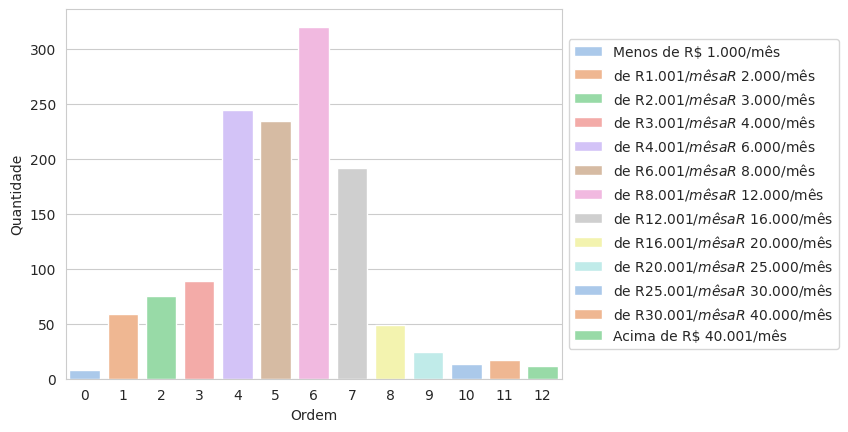

In [189]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_agg, x='Ordem', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 5\.3\. Por Salário e Cargo


In [190]:
#chamando aqui para relembrar o DataFrame
salario_cargo_agg.head(15)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


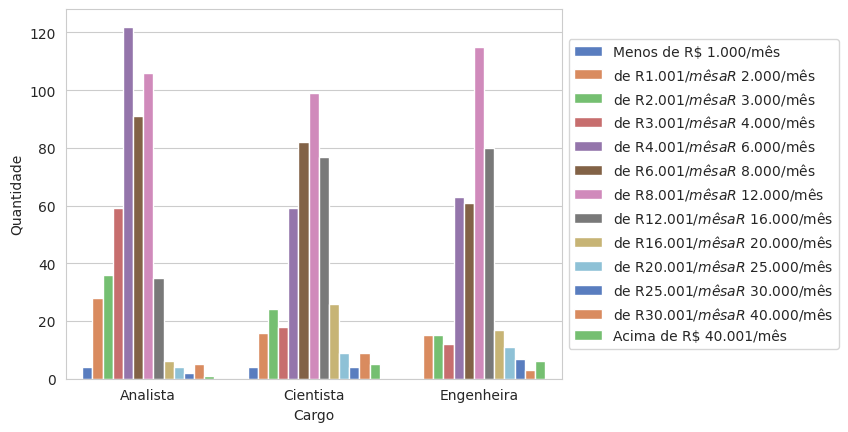

In [191]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_cargo_agg, x='Cargo', y='Quantidade', hue='Salário', palette='muted')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 5\.4\. Por Salário, Cargo e Experiência

Por fim, aplicou-se a mesma técnica dos gráficos anteriores, mas agora distribuidos por **experiência** (eixo x) e **cargo** (DataFrame dedicado).




*   **Analista de dados**








In [192]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Analista']

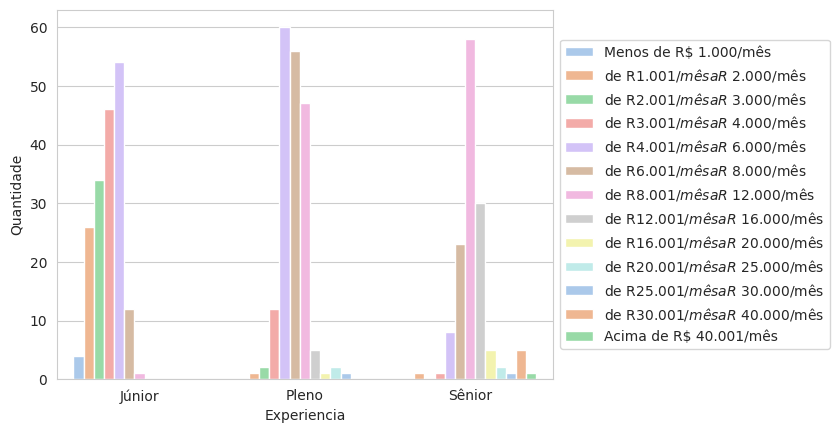

In [193]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiencia', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))



*   **Cientista de dados**








In [194]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Cientista']

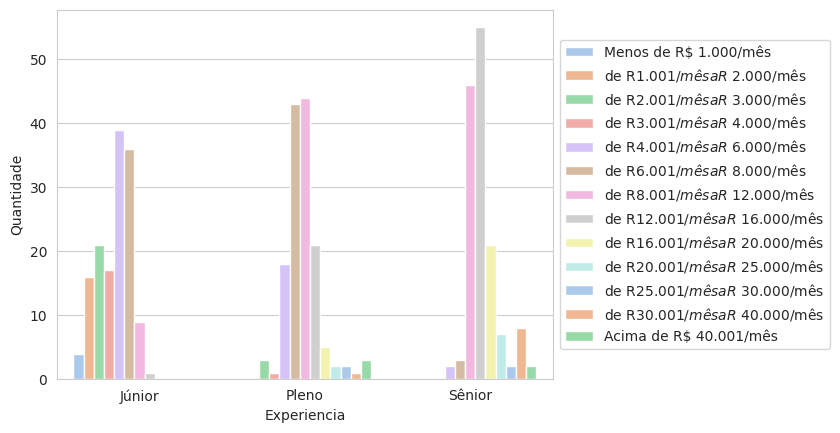

In [195]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiencia', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))



*   **Engenheiro de dados**








In [196]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Engenheira']

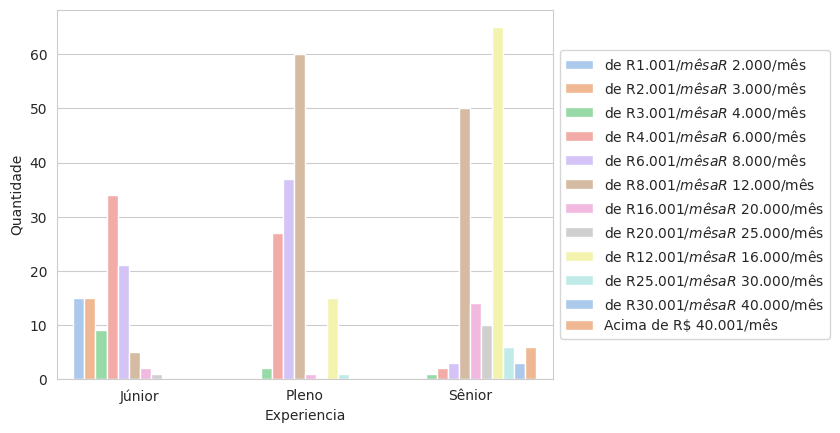

In [197]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiencia', y='Quantidade', hue='Salário', palette='pastel')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))



*   **Por níveis de Experiência**








In [207]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Experiencia'] == 'Sênior'] # gráfico mutavel inputar experiencia aqui

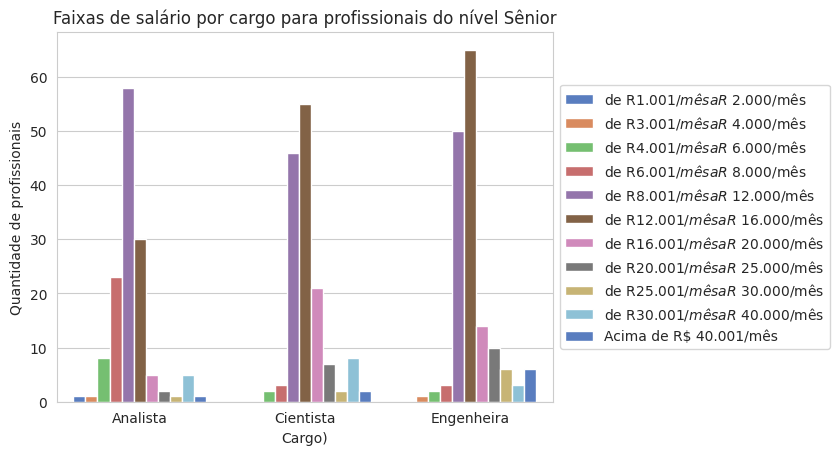

In [206]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Cargo', y='Quantidade', hue='Salário', palette='muted')

  plot.set_title('Faixas de salário por cargo para profissionais do nível Sênior') # Acrescentou funcoes titulos
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Cargo)')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 6\. Conclusão

**Resultados**
   



*   Nota-se que a distribuição das faixas de salário do cargo de analista tem
maior concentração nas faixas de mil a seis mil Reais por mês;
*   Em contraste, a distribuição das faixas de salário dos cargos de cientista e engenheiro é concentrada entre as faixas de quatro mil a oito mil Reais por mês;
*   A maioria dos profissionais pesquisados são analistas e de nível Júnior, o que pode ser um indicativo de profissionais migrando para esta área;
*   Os maiores salários são dos profissionais engenheiros, porém com níveis Senior de experiência;
*   Mesmo com as menores faixas salariais, os analistas dispõe de maior número de vagas no mercado;
*   Média de Nível Júnior para os três cargos: de 2 mil a 6 mil Reais por mês.
*   Média de Nível Pleno para os três cargos: de 6 mil a 8 mil Reais por mês.
*   Média de Nível Sênior para os três cargos: de 8 mil a 12 mil Reais por mês.














